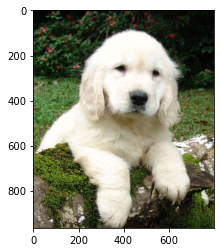

Image dimensions: (965, 800, 3)


In [1]:
import imageio
import matplotlib.pyplot as plt

# Read in wiki puppy image stored as RGB
img_puppy = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg')
# Graph image
plt.imshow(img_puppy)
# Display plot
plt.show()

# View shape
print(f'Image dimensions: {img_puppy.shape}')

In [2]:
from PIL import Image

# Convert from numpy array to PIL
img_puppy_PIL = Image.fromarray(img_puppy.astype('uint8'), 'RGB')

In [3]:
from torchvision import transforms
import numpy as np 

# Construct image preprocessing augmentation
Augmentation_Flip = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomHorizontalFlip(1),
    transforms.ToTensor()
])

Augmentation_Rotae = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

Augmentation_Crop = transforms.Compose([
    transforms.CenterCrop(size = 100),
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Augmentation_Color = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.ToTensor()
])

Augmentation_Blur = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

Resize_Only = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])


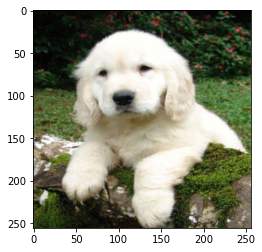

In [4]:
# Apply the recipe transformations to image
Flip_img = Augmentation_Flip(img_puppy_PIL)
Rotae_img = Augmentation_Rotae(img_puppy_PIL)
Crop_img = Augmentation_Crop(img_puppy_PIL)
Color_img = Augmentation_Color(img_puppy_PIL)
Blur_img = Augmentation_Blur(img_puppy_PIL)
Original_img = Resize_Only(img_puppy_PIL)

plt.imshow(np.array(Flip_img).transpose(1, 2, 0))
# Check the image shape has changed.

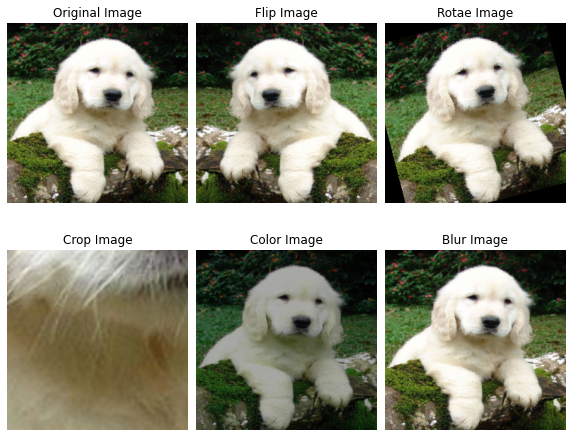

In [5]:
# Construct comparison image 
fig, axis_array = plt.subplots(2, 3, figsize=(10, 12))

axis_array[0,0].imshow(np.array(Original_img).transpose(1, 2, 0))
axis_array[0,0].set_title('Original Image')
axis_array[0,0].axis("off")

axis_array[0,1].imshow(np.array(Flip_img).transpose(1, 2, 0))
axis_array[0,1].set_title('Flip Image')
axis_array[0,1].axis("off")

axis_array[0,2].imshow(np.array(Rotae_img).transpose(1, 2, 0))
axis_array[0,2].set_title('Rotae Image')
axis_array[0,2].axis("off")

axis_array[1,0].imshow(np.array(Crop_img).transpose(1, 2, 0))
axis_array[1,0].set_title('Crop Image')
axis_array[1,0].axis("off")

axis_array[1,1].imshow(np.array(Color_img).transpose(1, 2, 0))
axis_array[1,1].set_title('Color Image')
axis_array[1,1].axis("off")

axis_array[1,2].imshow(np.array(Blur_img).transpose(1, 2, 0))
axis_array[1,2].set_title('Blur Image')
axis_array[1,2].axis("off")

plt.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.7
                    )
plt.savefig('augmentation.png')